In [2]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [4]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))

0.9473684210526315
0.8


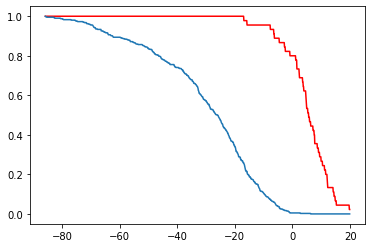

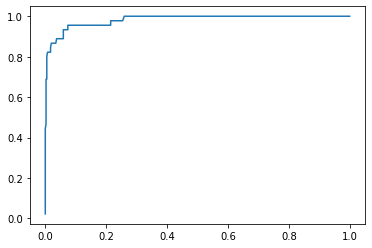

In [10]:
import sys
sys.path.append('/mycode/code-basic-machine-learning/10-classification-performance-measures/10.7-roc-curve')
from myML.metrics import FPR, TPR

decision_scores = lr.decision_function(X_test)
tprs = []
fprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >=  threshold, dtype='int')
    tprs.append(TPR(y_test, y_predict))
    fprs.append(FPR(y_test, y_predict))

import matplotlib.pyplot as plt
plt.plot(thresholds, tprs, color='r')
plt.plot(thresholds, fprs)
plt.show()

plt.plot(fprs, tprs)
plt.show()

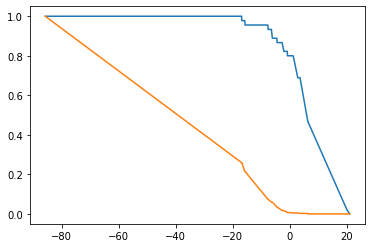

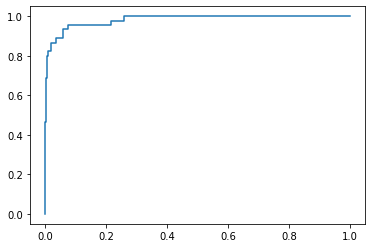

In [9]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)
plt.plot(thresholds, tprs)
plt.plot(thresholds, fprs)
plt.show()

plt.plot(fprs, tprs)
plt.show()


In [7]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)





0.9823868312757201